# Personality Detection

<h3> Overview Of Dataset </h3>
<p> The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axes:  </p>

<p><code>
Introversion (I) – Extroversion (E)<br>
Intuition (N) – Sensing (S)<br>
Thinking (T) – Feeling (F)<br>
Judging (J) – Perceiving (P)</code> </p>

<p>So for example, someone who prefers introversion, intuition, thinking and perceiving would be labelled an INTP in the MBTI system, and there are lots of personality based components that would model or describe this person’s preferences or behaviour based on the label.</p>

## Importing Modules and Analyzing Data

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras
import transformers
from keras import backend as K
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import regex as re
import string
import pickle
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import plotly.express as px
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

2022-05-02 13:21:57.027587: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-02 13:21:57.027625: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv('mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


<h3>Analysing Stopwords</h3>

In [3]:
ps = PorterStemmer()
wnl = WordNetLemmatizer()
sp = string.punctuation

engstopwords = stopwords.words("english")
engstopwordsV2 = re.sub('[' + re.escape(string.punctuation) + ']', '', ' '.join(engstopwords)).split()

engstopwords = set(engstopwords).union(set(engstopwordsV2))
len(engstopwords)

204

<h3> Visualizing Class Distribution </h3>

<AxesSubplot:xlabel='type', ylabel='count'>

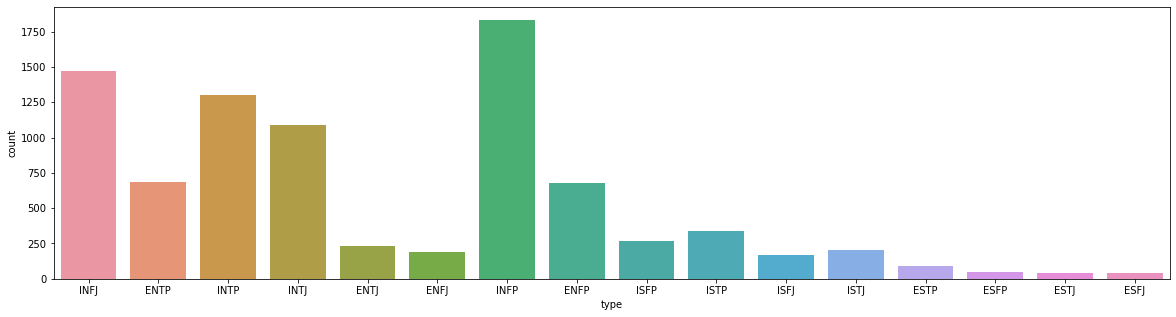

In [4]:
fig = plt.gcf()
fig.set_size_inches(20, 5)
sns.countplot(x="type", data = df)

In [5]:
px.pie(df,names='type',title='Distribution of personality types',hole=0.25)

In [6]:
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

## Preprocessing

<h3> Cleaning the given Text by removing links and other symbols using regex </h3>

In [7]:
def clean_text(data):
    data_length = []
    wnl = WordNetLemmatizer()
    cleaned_text = []
    for sentence in data.posts:
        sentence=sentence.lower()
        
        #removing links from text data using regex
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    
        #removing other symbols using regex
        sentence=re.sub('[^0-9a-z]',' ',sentence)
            
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)

    return cleaned_text, data_length

In [9]:
df.posts, data_length = clean_text(df)
df

,type,posts
0,INFJ,and intj moments sportscenter not top t...
1,ENTP,i m finding the lack of me in these posts ver...
2,INTP,good one course to which i say i ...
3,INTJ,dear intp i enjoyed our conversation the o...
4,ENTJ,you re fired that s another silly misconce...
...,...,...
8670,ISFP,just because i always think of cats as fi d...
8671,ENFP,so if this thread already exists someplace ...
8672,INTP,so many questions when i do these things i ...
8673,INFP,i am very conflicted right now when it comes ...


<h3> Data spliting using train_test_split </h3>

In [10]:
from sklearn.model_selection import train_test_split

posts = df['posts'].values
labels =  df['type'].values
df_train, df_test = train_test_split(df, random_state = 45, test_size=0.2)

train_size = len(df_train)
test_size = len(df_test)
train_size, test_size

(6940, 1735)

In [11]:
train_labels = df_train['type']
test_labels = df_test['type']

lbl=LabelEncoder()
train_classes=lbl.fit_transform(train_labels)
test_classes=lbl.fit_transform(test_labels)

<h3> Text Density Visualization </h3>

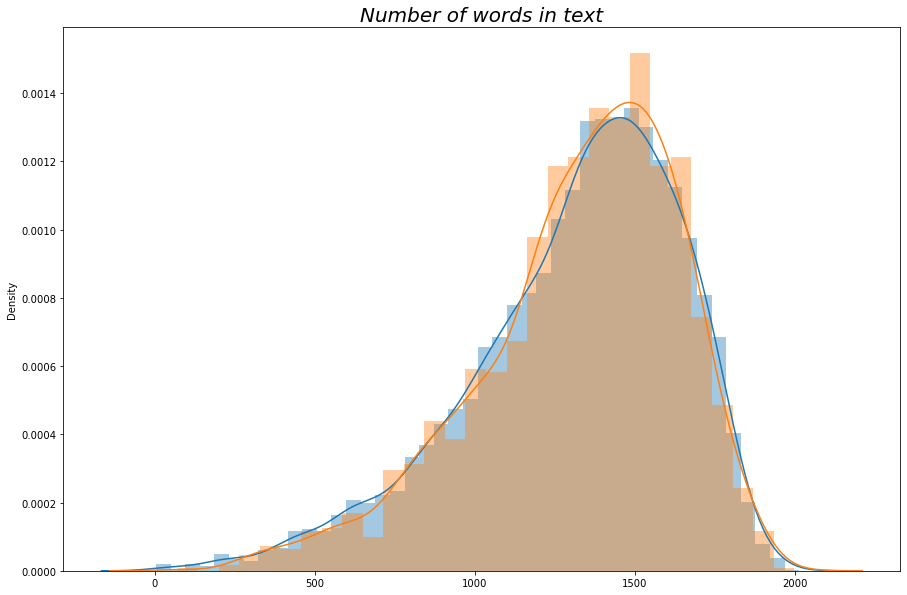

In [11]:
plt.figure(figsize=(15,10))
sns.distplot(data_length[:6940],label='train data word length')
sns.distplot(data_length[6940:],label='test data word length')
plt.title('Number of words in text',fontdict={'size':20,'style':'italic'})
plt.show()

## Applying Google Bert Tokenizer(**Removed)

In [13]:
# from transformers import BertTokenizer
# from keras.preprocessing.sequence import pad_sequences

# bert_model_name = 'bert-base-uncased'

# tokenizer = BertTokenizer.from_pretrained(bert_model_name, do_lower_case=True)
# max_len = 1800

# def tokenize_text(text, tokenizer, max_len = 1800):
#     tokenized_text = []

#     for sentence in text:
#         tokenized_sentence = tokenizer.encode(sentence, add_special_tokens = True, max_length = max_len)
#         tokenized_text.append(tokenized_sentence)

#     return tokenized_text

# def attention_masking(tok_pad_text):
#     attention_masks = []

#     for sentence in tok_pad_text:
#         mask = [int(token_id > 0) for token_id in sentence]
#         attention_masks.append(mask)

#     return np.asarray(attention_masks)

# train_data = tokenize_text(df_train['posts'], tokenizer, max_len)
# train_data = pad_sequences(train_data, maxlen=max_len, dtype="long", value=0, truncating="post", padding="post")
# train_attention_masks = attention_masking(train_data)

# test_data = tokenize_text(df_test['posts'], tokenizer, max_len)
# test_data = pad_sequences(test_data, maxlen=max_len, dtype="long", value=0, truncating="post", padding="post")
# test_attention_masks = attention_masking(test_data)

In [14]:
# train_data

In [15]:
# ohe = tf.keras.utils.to_categorical(train_classes.values, num_classes=16)
# ohet = tf.keras.utils.to_categorical(test_classes.values, num_classes=16)

## Applying TfidVectorizer

In [16]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [17]:
import nltk
nltk.download("wordnet", "/home/brillard/bricode/PY/PRML Bonus/nltk_data/")
nltk.download("omw-1.4", "/home/brillard/bricode/PY/PRML Bonus/nltk_data/")

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/brillard/bricode/PY/PRML Bonus/nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/brillard/bricode/PY/PRML Bonus/nltk_data/...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [18]:
nltk.data.path.append("/home/brillard/bricode/PY/PRML Bonus/nltk_data/")

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer( max_features=5000,stop_words='english', tokenizer = Lemmatizer())
vectorizer.fit(df.posts)

TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x7f6a9f607370>)

<h3> Visualizing WordCloud </h3>

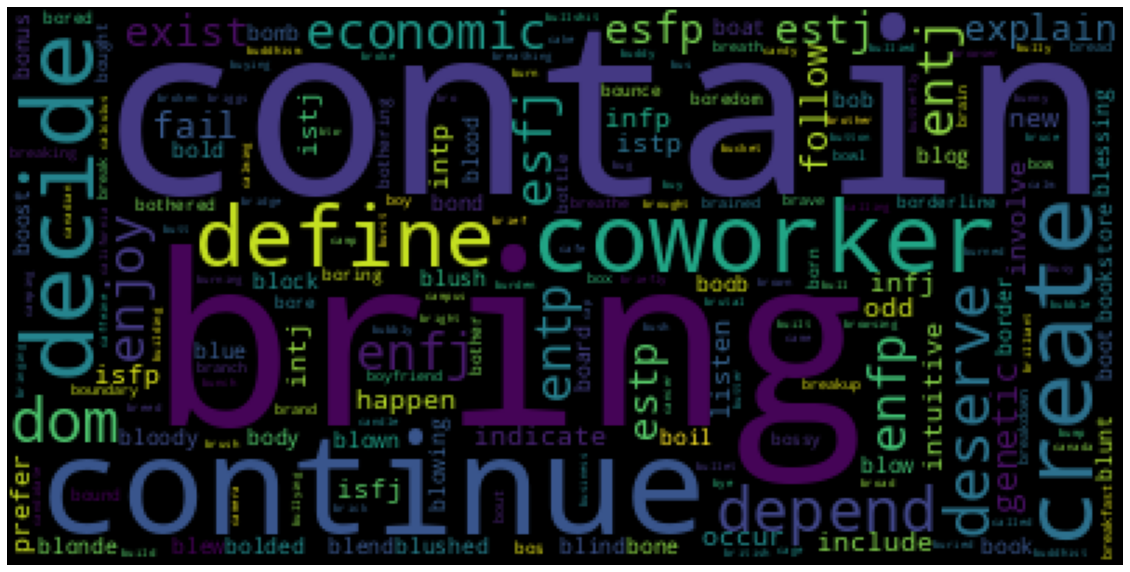

In [20]:
feature_names=vectorizer.get_feature_names()
wc=WordCloud(max_words=400)
wc.generate(' '.join(word for word in feature_names[500:3500] ))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)

In [21]:
train_post=vectorizer.transform(df_train.posts).toarray()
test_post=vectorizer.transform(df_test.posts).toarray()

## Classification Models

### LGBMClassifier

In [35]:
# importing models
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(boosting_type="gbdt", num_leaves=10, max_depth = 10, n_estimators=400, n_jobs=-1)

In [47]:
model_lgb.fit(train_post, train_classes)

LGBMClassifier(max_depth=10, n_estimators=400, num_leaves=10)

In [48]:
lgb_train = model_lgb.predict(train_post)
lgb_test = model_lgb.predict(test_post)

lgb_training_score = accuracy_score(train_classes, lgb_train)
lgb_testing_score = accuracy_score(test_classes, lgb_test)
print(str(round(lgb_training_score*100,2))+'%', ',', str(round(lgb_testing_score*100,2))+'%')

100.0% , 65.42%


In [49]:
print('train classification report \n ',classification_report(train_classes,model_lgb.predict(train_post),target_names=lbl.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_classes,model_lgb.predict(test_post),target_names=lbl.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      1.00      1.00       140
        ENFP       1.00      1.00      1.00       517
        ENTJ       1.00      1.00      1.00       176
        ENTP       1.00      1.00      1.00       556
        ESFJ       1.00      1.00      1.00        33
        ESFP       1.00      1.00      1.00        37
        ESTJ       1.00      1.00      1.00        33
        ESTP       1.00      1.00      1.00        71
        INFJ       1.00      1.00      1.00      1214
        INFP       1.00      1.00      1.00      1484
        INTJ       1.00      1.00      1.00       851
        INTP       1.00      1.00      1.00      1035
        ISFJ       1.00      1.00      1.00       138
        ISFP       1.00      1.00      1.00       220
        ISTJ       1.00      1.00      1.00       163
        ISTP       1.00      1.00      1.00       272

    accuracy                           1.00      

### Logistic Regression

In [70]:
model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_log.fit(train_post,train_classes)

LogisticRegression(C=0.5, max_iter=3000, n_jobs=-1)

In [51]:
lr_train = model_log.predict(train_post)
lr_test = model_log.predict(test_post)

lr_training_score = accuracy_score(train_classes, lr_train)
lr_testing_score = accuracy_score(test_classes, lr_test)
print(str(round(lr_training_score*100,2))+'%', ',', str(round(lr_testing_score*100,2))+'%')

72.25% , 61.61%


In [52]:
print('train classification report \n ',classification_report(train_classes,model_log.predict(train_post),target_names=lbl.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_classes,model_log.predict(test_post),target_names=lbl.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.83      0.14      0.23       140
        ENFP       0.82      0.64      0.72       517
        ENTJ       0.96      0.25      0.40       176
        ENTP       0.81      0.66      0.73       556
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        37
        ESTJ       0.00      0.00      0.00        33
        ESTP       1.00      0.03      0.05        71
        INFJ       0.74      0.83      0.78      1214
        INFP       0.65      0.93      0.77      1484
        INTJ       0.74      0.80      0.77       851
        INTP       0.70      0.88      0.78      1035
        ISFJ       0.86      0.23      0.37       138
        ISFP       0.86      0.27      0.41       220
        ISTJ       0.84      0.23      0.37       163
        ISTP       0.82      0.53      0.65       272

    accuracy                           0.72      

### Linear SVC

In [87]:
from sklearn.svm import SVC,LinearSVC
model_linear_svc=LinearSVC(C=0.1)
model_linear_svc.fit(train_post,train_classes)

LinearSVC(C=0.1)

In [54]:
lsvc_train = model_linear_svc.predict(train_post)
lsvc_test = model_linear_svc.predict(test_post)

lsvc_training_score = accuracy_score(train_classes, lsvc_train)
lsvc_testing_score = accuracy_score(test_classes, lsvc_test)
print(str(round(lsvc_training_score*100,2))+'%', ',', str(round(lsvc_testing_score*100,2))+'%')

81.93% , 65.53%


In [55]:
print('train classification report \n ',classification_report(train_classes,model_linear_svc.predict(train_post),target_names=lbl.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_classes,model_linear_svc.predict(test_post),target_names=lbl.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.89      0.40      0.55       140
        ENFP       0.85      0.75      0.80       517
        ENTJ       0.94      0.66      0.78       176
        ENTP       0.84      0.80      0.82       556
        ESFJ       0.92      0.36      0.52        33
        ESFP       1.00      0.11      0.20        37
        ESTJ       1.00      0.21      0.35        33
        ESTP       0.95      0.55      0.70        71
        INFJ       0.82      0.85      0.84      1214
        INFP       0.76      0.94      0.84      1484
        INTJ       0.83      0.85      0.84       851
        INTP       0.81      0.89      0.85      1035
        ISFJ       0.92      0.65      0.76       138
        ISFP       0.90      0.60      0.72       220
        ISTJ       0.90      0.63      0.74       163
        ISTP       0.89      0.82      0.85       272

    accuracy                           0.82      

### SVC(Support Vector Classifier)

In [30]:
from sklearn.svm import SVC
model_svc=SVC(kernel='rbf', decision_function_shape='ovo')
model_svc.fit(train_post,train_classes)

SVC(decision_function_shape='ovo')

In [31]:
svc_train = model_svc.predict(train_post)
svc_test = model_svc.predict(test_post)

svc_training_score = accuracy_score(train_classes, svc_train)
svc_testing_score = accuracy_score(test_classes, svc_test)
print(str(round(svc_training_score*100,2))+'%', ',', str(round(svc_testing_score*100,2))+'%')

95.04% , 63.8%


In [32]:
print('train classification report \n ',classification_report(train_classes,model_svc.predict(train_post),target_names=lbl.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_classes,model_svc.predict(test_post),target_names=lbl.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.97      0.82      0.89       140
        ENFP       0.96      0.93      0.95       517
        ENTJ       0.98      0.94      0.96       176
        ENTP       0.97      0.96      0.96       556
        ESFJ       1.00      0.58      0.73        33
        ESFP       1.00      0.32      0.49        37
        ESTJ       1.00      0.52      0.68        33
        ESTP       1.00      0.87      0.93        71
        INFJ       0.94      0.97      0.96      1214
        INFP       0.93      0.98      0.96      1484
        INTJ       0.96      0.97      0.96       851
        INTP       0.95      0.97      0.96      1035
        ISFJ       0.99      0.89      0.94       138
        ISFP       0.97      0.88      0.92       220
        ISTJ       0.95      0.90      0.92       163
        ISTP       0.97      0.94      0.95       272

    accuracy                           0.95      

### XGBoost Classifier

In [59]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier(tree_method='auto',max_depth=6,n_estimators=50,learning_rate=0.1)
model_xgb.fit(train_post,train_classes)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [60]:
xgb_train = model_xgb.predict(train_post)
xgb_test = model_xgb.predict(test_post)

xgb_training_score = accuracy_score(train_classes, xgb_train)
xgb_testing_score = accuracy_score(test_classes, xgb_test)
print(str(round(xgb_training_score*100,2))+'%', ',', str(round(xgb_testing_score*100,2))+'%')

97.29% , 65.13%


In [61]:
print('train classification report \n ',classification_report(train_classes,model_xgb.predict(train_post),target_names=lbl.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_classes,model_xgb.predict(test_post),target_names=lbl.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.99      0.99       140
        ENFP       0.98      0.97      0.98       517
        ENTJ       1.00      0.99      1.00       176
        ENTP       0.99      0.97      0.98       556
        ESFJ       1.00      1.00      1.00        33
        ESFP       1.00      0.97      0.99        37
        ESTJ       1.00      0.88      0.94        33
        ESTP       1.00      0.99      0.99        71
        INFJ       0.96      0.97      0.96      1214
        INFP       0.95      0.98      0.97      1484
        INTJ       0.97      0.97      0.97       851
        INTP       0.97      0.96      0.97      1035
        ISFJ       1.00      0.99      0.99       138
        ISFP       1.00      0.96      0.98       220
        ISTJ       1.00      0.98      0.99       163
        ISTP       0.99      1.00      0.99       272

    accuracy                           0.97      

### KNN ( K nearest neighbors)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', n_jobs=-1)
model_knn.fit(train_post,train_classes)

KNeighborsClassifier(n_jobs=-1)

In [63]:
knn_train = model_knn.predict(train_post)
knn_test = model_knn.predict(test_post)

knn_training_score = accuracy_score(train_classes, knn_train)
knn_testing_score = accuracy_score(test_classes, knn_test)
print(str(round(knn_training_score*100,2))+'%', ',', str(round(knn_testing_score*100,2))+'%')

55.66% , 39.14%


In [64]:
print('train classification report \n ',classification_report(train_classes,model_knn.predict(train_post),target_names=lbl.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_classes,model_knn.predict(test_post),target_names=lbl.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.42      0.46      0.44       140
        ENFP       0.47      0.66      0.55       517
        ENTJ       0.68      0.40      0.51       176
        ENTP       0.68      0.54      0.61       556
        ESFJ       0.44      0.45      0.45        33
        ESFP       0.44      0.11      0.17        37
        ESTJ       0.78      0.42      0.55        33
        ESTP       0.68      0.32      0.44        71
        INFJ       0.64      0.69      0.66      1214
        INFP       0.43      0.91      0.59      1484
        INTJ       0.80      0.30      0.44       851
        INTP       0.87      0.36      0.51      1035
        ISFJ       0.79      0.46      0.58       138
        ISFP       0.80      0.28      0.41       220
        ISTJ       0.85      0.24      0.37       163
        ISTP       0.80      0.16      0.27       272

    accuracy                           0.56      

### CatBoost Classifier

In [26]:
from catboost import CatBoostClassifier

model_cat=CatBoostClassifier(loss_function='MultiClass',eval_metric='MultiClass',iterations=50,verbose=True)
model_cat.fit(train_post,train_classes)

Learning rate set to 0.5
0:	learn: 1.9484290	total: 11.6s	remaining: 9m 30s
1:	learn: 1.8399266	total: 23.4s	remaining: 9m 21s
2:	learn: 1.7685597	total: 35.1s	remaining: 9m 9s
3:	learn: 1.7045017	total: 47.8s	remaining: 9m 10s
4:	learn: 1.6232648	total: 1m	remaining: 9m 8s
5:	learn: 1.5700821	total: 1m 13s	remaining: 8m 55s
6:	learn: 1.5277985	total: 1m 25s	remaining: 8m 46s
7:	learn: 1.4855080	total: 1m 38s	remaining: 8m 37s
8:	learn: 1.4662652	total: 1m 51s	remaining: 8m 27s
9:	learn: 1.4398214	total: 2m 4s	remaining: 8m 18s
10:	learn: 1.4289021	total: 2m 18s	remaining: 8m 10s
11:	learn: 1.3963719	total: 2m 31s	remaining: 7m 58s
12:	learn: 1.3866822	total: 2m 42s	remaining: 7m 43s
13:	learn: 1.3497563	total: 2m 54s	remaining: 7m 29s
14:	learn: 1.3440104	total: 3m 5s	remaining: 7m 13s
15:	learn: 1.3268159	total: 3m 17s	remaining: 6m 59s
16:	learn: 1.3152851	total: 3m 29s	remaining: 6m 46s
17:	learn: 1.3037195	total: 3m 41s	remaining: 6m 33s
18:	learn: 1.2971346	total: 3m 53s	remainin

In [27]:
cat_train = model_cat.predict(train_post)
cat_test = model_cat.predict(test_post)

cat_training_score = accuracy_score(train_classes, cat_train)
cat_testing_score = accuracy_score(test_classes, cat_test)
print(str(round(cat_training_score*100,2))+'%', ',', str(round(cat_testing_score*100,2))+'%')

68.43% , 59.94%


In [28]:
print('train classification report \n ',classification_report(train_classes,model_cat.predict(train_post),target_names=lbl.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_classes,model_cat.predict(test_post),target_names=lbl.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.56      0.34      0.43       140
        ENFP       0.68      0.68      0.68       517
        ENTJ       0.59      0.44      0.51       176
        ENTP       0.68      0.63      0.66       556
        ESFJ       1.00      0.18      0.31        33
        ESFP       0.50      0.03      0.05        37
        ESTJ       0.89      0.24      0.38        33
        ESTP       0.71      0.42      0.53        71
        INFJ       0.71      0.74      0.72      1214
        INFP       0.69      0.82      0.75      1484
        INTJ       0.67      0.69      0.68       851
        INTP       0.66      0.73      0.69      1035
        ISFJ       0.72      0.54      0.62       138
        ISFP       0.66      0.51      0.57       220
        ISTJ       0.70      0.48      0.57       163
        ISTP       0.82      0.57      0.68       272

    accuracy                           0.68      

## Analyzing Results of Various Models

<h3> Creating a Dictionary of Testing Accuracies </h3>

In [80]:
models_accuracy_t = {}

In [ ]:
models_accuracy_t['LGBMClassifier']=accuracy_score(test_classes,model_lgb.predict(train_post))
models_accuracy_t['Logistic Regression']=accuracy_score(test_classes,model_log.predict(train_post))
models_accuracy_t['LinearSVC Classifier']=accuracy_score(test_classes,model_linear_svc.predict(train_post))
models_accuracy_t['Support Vector Classifier(SVC)']=accuracy_score(test_classes,model_svc.predict(train_post))
models_accuracy_t['XGBoost Classifier']=accuracy_score(test_classes,model_xgb.predict(train_post))
models_accuracy_t['K Nearest Neighbors(KNN)']=accuracy_score(test_classes,model_knn.predict(train_post))
models_accuracy_t['CatBoost Classifier']=accuracy_score(test_classes,model_cat.predict(train_post))

In [82]:
models_accuracy_t

{'LGBMClassifier': 100,
 'Logistic Regression': 72.25,
 'LinearSVC Classifier': 81.93,
 'Support Vector Classifier(SVC)': 95.04,
 'XGBoost Classifier': 97.29,
 'K Nearest Neighbors(KNN)': 55.66,
 'CatBoost Classifier': 68.43}

In [83]:
models_accuracy = {}

In [ ]:
models_accuracy['LGBMClassifier']=accuracy_score(test_classes,model_lgb.predict(test_post))
models_accuracy['Logistic Regression']=accuracy_score(test_classes,model_log.predict(test_post))
models_accuracy['LinearSVC Classifier']=accuracy_score(test_classes,model_linear_svc.predict(test_post))
models_accuracy['Support Vector Classifier(SVC)']=accuracy_score(test_classes,model_svc.predict(test_post))
models_accuracy['XGBoost Classifier']=accuracy_score(test_classes,model_xgb.predict(test_post))
models_accuracy['K Nearest Neighbors(KNN)']=accuracy_score(test_classes,model_knn.predict(test_post))
models_accuracy['CatBoost Classifier']=accuracy_score(test_classes,model_cat.predict(test_post))

In [85]:
models_accuracy

{'LGBMClassifier': 65.42,
 'Logistic Regression': 61.61,
 'LinearSVC Classifier': 65.53,
 'Support Vector Classifier(SVC)': 63.8,
 'XGBoost Classifier': 65.13,
 'K Nearest Neighbors(KNN)': 39.14,
 'CatBoost Classifier': 59.94}

<h3> Visualizing Different Model Accuracies </h3>

In [86]:
accuracy_t=pd.DataFrame(models_accuracy_t.items(),columns=['Models','Train accuracy'])
accuracy=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])
accuracy = accuracy.iloc[:,-1]
accuracy = pd.concat([accuracy_t, accuracy], axis=1)

accuracy.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Train accuracy,Test accuracy
0,LinearSVC Classifier,81.930000,65.530000
1,LGBMClassifier,100.000000,65.420000
2,XGBoost Classifier,97.290000,65.130000
3,Support Vector Classifier(SVC),95.040000,63.800000
4,Logistic Regression,72.250000,61.610000
5,CatBoost Classifier,68.430000,59.940000
6,K Nearest Neighbors(KNN),55.660000,39.140000


## Personality Prediction of Custom Text

### Data Preprocessing

In [60]:
# cols = df['type'].unique()
# cols = cols.tolist()

# colnames = ['sentence']
# colnames = colnames+cols

In [92]:
# df_predict = pd.DataFrame(columns = colnames)
text = "We don't run away. We work in the dark to serve the light."

<h3> Cleaning Text </h3>

In [93]:
def clean_senten(text):
    text=text.lower()
        
    #removing links from text data using regex
    text=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',text)

    #removing other symbols using regex
    text=re.sub('[^0-9a-z]',' ',text)
        
    data_length=len(text.split())
    cleaned_text=text

    return cleaned_text

senten = clean_senten(text)

<h3> Vectorizing Text </h3>

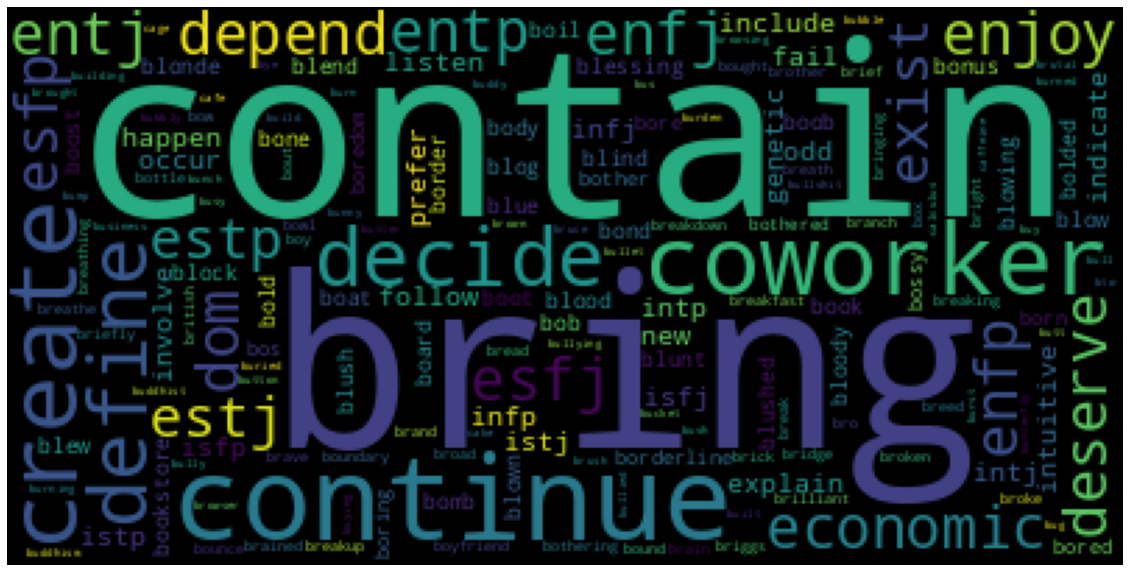

In [94]:
cust_feature_names=vectorizer.get_feature_names()
cust_wc=WordCloud(max_words=400)
cust_wc.generate(' '.join(word for word in feature_names[500:3500] ))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(cust_wc)

In [95]:
senten=vectorizer.transform([senten]).toarray()

<h3> Predicting Personality from the most accurate model </h3>

In [96]:
persona = lbl.inverse_transform(model_linear_svc.predict(senten))
print("Personality type of the person is :",persona[0])

Personality type of the person is : INTJ


## Finished**